<a href="https://colab.research.google.com/github/finesketch/data_science/blob/main/mnist_tSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST with Unsupervised Learning

Use a **t-Distributed Stochastic Neighbour Embedding (t-SNE)** decomposition  of this dataset for the *unsupervised learning*.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

In [15]:
%matplotlib inline

In [16]:
X_train, y_train = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
y_train = y_train.astype(int)

In [17]:
X_train.shape

(70000, 784)

In [18]:
y_train.shape

(70000,)

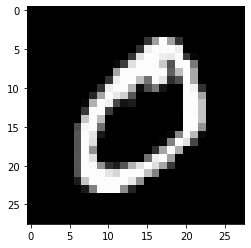

In [19]:
single_image = X_train[1,:].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [20]:
# use a t-Distributed Stochastic Neighbour Embedding (t-SNE) decomposition  of this dataset for "unsupervised learning"
# the t-SNE transformation of the data
# 2 components for 2-dimensional setting
tsne = manifold.TSNE(n_components=2, random_state=42)

# use only 10000 images, so the shape is 10000x2
transformed_data = tsne.fit_transform(X_train[:10000,:])

In [21]:
# convert into pandas DataFrame
tsne_df = pd.DataFrame(np.column_stack((transformed_data, y_train[:10000])), columns=['X', 'y', 'targets'])
tsne_df.loc[:, 'targets'] = tsne_df.targets.astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


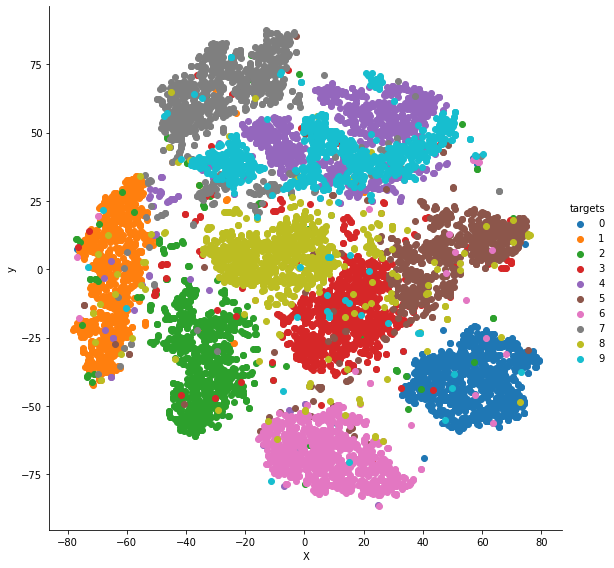

In [22]:
# plot
grid = sns.FacetGrid(tsne_df, hue='targets', size=8)
grid.map(plt.scatter, 'X', 'y').add_legend()

In [23]:
tsne_df.head(20)

,X,y,targets
0,41.823372,4.305034,5
1,51.921452,-35.015118,0
2,37.115925,66.432014,4
3,-64.611313,26.061253,1
4,10.549828,31.709473,9
5,-41.365219,-48.555305,2
6,-66.673149,-37.337299,1
7,-1.692807,-15.081616,3
8,-68.560936,-28.855669,1
9,-14.450241,47.090439,4
